AIAB2

In [ ]:
import numpy as np

# number of items in our problem
num_items = 10

# hill climbing genotype
genotype = np.random.choice([0, 1], (num_items))
print(genotype)

[1 0 1 0 1 0 1 1 0 1]


* There are several ways in which you can encode the problem itself (the volumes and benefit of each object). It may be useful to store these values as an array:

In [ ]:
import numpy as np

max_volume = 65
num_items = 40
num_individuals = 1
genotype = np.random.choice([0, 1], (num_individuals, num_items))
#benefits = np.random.randint(1,11,size=num_items)
#volumes = np.random.randint(1,11,size=num_items)
#Created a constant volume and benefits for better results for testing
volumes = np.array([10 , 6 , 4 , 1 ,10 , 6 , 2 , 1 , 8 , 9 , 6 , 2 , 3 , 1, 10 , 9 , 8 ,10 , 1 , 1 , 6 ,10 , 8 , 5
 , 6 , 1 , 4 , 3 , 6 , 6 , 7 , 5 , 9 , 9 , 4 , 1 , 2 , 2 , 5 ,10],dtype=np.int8)

benefits = np.array([6 , 4 , 8 , 5 , 5 , 6 , 2 , 7 , 5 , 3 , 6 , 4 , 1 , 9 , 5 , 3 , 8 , 4 , 9 , 8 , 6 , 8 , 9 , 7
 ,10 , 8 , 2 , 9 , 6 , 8 , 9 ,10 , 8 , 7 , 7 , 9 , 4 , 2 , 7 , 6],dtype=np.int8)
print(volumes)
print(benefits)

[10  6  4  1 10  6  2  1  8  9  6  2  3  1 10  9  8 10  1  1  6 10  8  5
  6  1  4  3  6  6  7  5  9  9  4  1  2  2  5 10]
[ 6  4  8  5  5  6  2  7  5  3  6  4  1  9  5  3  8  4  9  8  6  8  9  7
 10  8  2  9  6  8  9 10  8  7  7  9  4  2  7  6]


In [ ]:
np.sum(benefits)

250

In [ ]:
np.sum(volumes)

217

* The fitness function should return a _single number_ which quantifies how close to the ideal solution a phenotype is. Below is a rough example of what this function should look like:

In [ ]:
'''
Parameters
genotype -> list
benefits -> list
volumes -> list
max_volumes ->Int
Used to check the fitness, if it is better it will return the fitness, if it isnt it will return whatever fitness it gets
'''
def fitness_function(genotype, benefits, volumes, max_volume):
  # put you fitness calculuations here
  fitness = 0
  vol = 0
  for i in range(len(genotype)):
    if genotype[i] == 1:
      vol += volumes[i]
      if vol < max_volume:
        fitness += benefits[i]
      else:
        break
  return fitness # a single number saying how good the geneotype is

* Implement your mutation by selecting a random gene (e.g by picking a random number between 1 and 10) and then flipping the number (0 to 1 or 1 to 0).

* Overwrite the current individual if the new indvidual is better.

**You will need to integrate these features into a loop which performs the genetic algorithm detailed above**.

In [ ]:
'''
Parameters
probility -> float
old_genotype -> list
Uses the probability to flip the genes
'''
def mutation(probility, old_genotype):
  fit = fitness_function(old_genotype, benefits, volumes, max_volume)
  size = len(old_genotype)
  current_genotype = np.copy(old_genotype)
  for i in range(len(old_genotype)):
    #Used to flip
    if probility >= random.random():
      if current_genotype[i] == 1:
        current_genotype[i] = 0
      elif current_genotype[i] == 0:
        current_genotype[i] = 1
  new_fit = fitness_function(current_genotype, benefits, volumes, max_volume)
  if new_fit > fit:
    return current_genotype, new_fit
  return old_genotype, fit

In [ ]:
'''
Parameters
winner -> list
loser -> list
probility -> float
mutation_rate -> float
Uses the probability to copy the winning parents genes to the loser parent
'''
def crossover(winner, loser, probility,mutation_rate):
  for i in range(len(loser)):
    if probility >= random.random():
      loser[i] = winner[i]
  return loser
  #loser,fitness = mutation(mutation_rate, loser)
  #return loser,fitness

In [ ]:
'''
Parameters
geno_pop -> list
k -> int
num_individuals -> int
Randomly picks a two genotypes from the population and neighourbor, and gets the fitness and returns the index of the winner and loser
'''
def selection(gene_pop, k,num_individuals):
  #Gets a random genotype from the population
  first_pick = random.randint(0,num_individuals-1)
  local_neighbour_idx = np.random.randint(first_pick+1, first_pick + k)%num_individuals
  g1 = gene_pop[first_pick]
  g2 = gene_pop[local_neighbour_idx, :]
  pick1 = fitness_function(g1, benefits, volumes, max_volume)
  pick2 = fitness_function(g2, benefits, volumes, max_volume)
  #Gets a random neighbour between k
  local_neighbour_idx = np.random.randint(first_pick + 1, first_pick + k) % len(gene_pop)
  if pick1 >= pick2:
    return first_pick, local_neighbour_idx
  else:
    return local_neighbour_idx, first_pick

# Full microbial GA
We will now implement a spatial GA. You will to put the population of N individuals on 1D array.

Pseudocode is as follows:
1. Initialise random pop $P$
2. Associate each individual with a position $x$, i.e, let the position of the genotype in the population matrix indicate the position on a 1D grid.
3. Pick one individual at random, i.e. genotype $G_1$ at position $x_1$
4. Pick a second individual $G_2$ in the local neighbourhood of the first, i.e., pick a competitor from the local neighbourhood in the range $x_1+1$ to $x_1 + k$ (start with $k=2$) 5. Compare $G_1$ and $G_2$ finding a winner (W) and loser (L)
6. Copy each gene of the winner W to the L with crossover probability (Pcrossover, say 0.5 to start)
7. Add a mutation to the new L and insert it back to the population.
8. Until success or give up, goto 3



> **Task**  Plot the fitness of the best individual versus the number of generations. Run several runs for fixed number of generations (tournaments) and plot a bar chart of the average fitness in different conditons. How does this algorithm compare to the first two? Does it evolve quicker? Does it get stuck in local minima more or less often. What is the effect of crossover on the speed of evolution?


Full microbal that returns the mean, max, and all fitness

In [ ]:
import statistics
import random
import math
def mean_full_microball(num_individuals, num_items, mutation_rate, iteration,crossover_rate, num_of_generations,k):
  max_fit = []
  mean_fit = []
  var_fit = []
  all_fitness = []
  #Creatings multiple generations to understaand the problem
  for generation in range(num_of_generations):
    print("\n New generation", generation)
    genotypes = np.random.choice([0, 1], (num_individuals, num_items))
    fitness = np.zeros(num_individuals)
    fit_list = [0]
    minmax_fit = []
    #Multiple interations
    for j in range (iteration):
      winner, loser = selection(genotypes, k,num_individuals)
      loser = crossover(genotypes[winner],genotypes[loser],crossover_rate,mutation_rate)
      new_gene,fitness = mutation(mutation_rate, loser)
      genotypes[loser] = new_gene
      minmax_fit.append(fitness)
      fit_list.append(max(fitness,max(fit_list)))
    all_fitness.append(fit_list)
    max_fit.append(max(fit_list))
  return max_fit,mean_fit,var_fit,all_fitness

In [ ]:
max_in_each_genotype,SE,variance,all_fit= mean_full_microball(num_individuals=30, num_items=40,mutation_rate=0.1,iteration=50,crossover_rate=0.8,num_of_generations=50,k=30)


 New generation 0

 New generation 1

 New generation 2

 New generation 3

 New generation 4

 New generation 5

 New generation 6

 New generation 7

 New generation 8

 New generation 9

 New generation 10

 New generation 11

 New generation 12

 New generation 13

 New generation 14

 New generation 15

 New generation 16

 New generation 17

 New generation 18

 New generation 19

 New generation 20

 New generation 21

 New generation 22

 New generation 23

 New generation 24

 New generation 25

 New generation 26

 New generation 27

 New generation 28

 New generation 29

 New generation 30

 New generation 31

 New generation 32

 New generation 33

 New generation 34

 New generation 35

 New generation 36

 New generation 37

 New generation 38

 New generation 39

 New generation 40

 New generation 41

 New generation 42

 New generation 43

 New generation 44

 New generation 45

 New generation 46

 New generation 47

 New generation 48

 New generation 49


In [ ]:
print(max_in_each_genotype)
print(len(all_fit))
print(all_fit)
length = [i+1 for i in range(len(all_fit))]

[102, 97, 112, 102, 99, 104, 111, 106, 110, 107, 92, 108, 113, 105, 100, 100, 99, 108, 90, 104, 105, 103, 98, 107, 103, 101, 105, 108, 97, 112, 98, 99, 109, 112, 104, 110, 120, 94, 89, 97, 104, 99, 111, 112, 113, 103, 95, 116, 106, 103]
50
[[0, 58, 62, 68, 75, 75, 75, 75, 79, 79, 79, 79, 79, 79, 82, 82, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 92, 92, 92, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 97, 97, 102, 102, 102, 102, 102, 102, 102, 102, 102], [0, 85, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97], [0, 46, 61, 62, 62, 62, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 107, 107, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 112, 112, 112, 112, 112, 112, 112, 112, 112], [0, 52, 52, 71, 79, 79, 81, 81, 81, 81, 81, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
#Getting the mean of each step so [1,4,5], [4,5,3] step one mean is 1+4/2
x = 0
mean = []
while(x != len(all_fit)):
  sum = 0
  for i in (all_fit):
    sum += i[x]
  mean.append(sum/len(all_fit))
  x += 1

print((mean))
print(length)

[0.0, 66.8, 75.32, 79.0, 82.14, 84.2, 86.9, 87.96, 88.6, 89.76, 90.08, 90.7, 91.78, 92.64, 93.84, 94.32, 94.98, 95.18, 95.4, 95.6, 96.42, 97.14, 97.14, 97.22, 97.38, 97.58, 97.6, 98.48, 98.84, 98.84, 98.88, 99.42, 100.08, 100.16, 100.32, 100.4, 100.98, 101.18, 101.18, 101.24, 101.62, 101.74, 102.36, 102.5, 102.56, 103.0, 103.34, 103.6, 103.76, 104.04]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


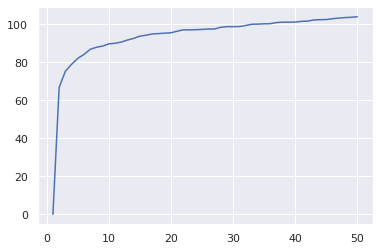

In [ ]:
plt.plot(length, mean)

In [ ]:

import math
import statistics
#Getting sme
x = 0
SE = []
var = []
s = []
while(x != len(all_fit)):
  sum = 0
  for i in (all_fit):
    sum += (i[x] - mean[x])**2
  var.append((sum/len(all_fit)))
  x += 1

SE = []
for num in var:
  SE.append(math.sqrt(num)/math.sqrt(len(all_fit)))
print(SE)

[0.0, 1.914993472573732, 1.6138004833311954, 1.621604144049959, 1.4764850151627005, 1.4280056022299072, 1.4060583202698247, 1.397414755897475, 1.3882362911262625, 1.362808864074489, 1.3475429492227697, 1.2156479753612885, 1.1850029535828166, 1.2434661233825388, 1.2922414635044028, 1.2216185984176895, 1.196825801860906, 1.1776892629212512, 1.22245654319489, 1.2309346042743294, 1.2073408797849927, 1.232236990193039, 1.232236990193039, 1.2407384897713134, 1.2402870635461773, 1.2109797686171309, 1.2086355943790503, 1.1600827556687499, 1.1707638532172064, 1.1707638532172064, 1.1667527587282573, 1.128925152523408, 1.0917289040782974, 1.0871467242281514, 1.0981584585113389, 1.0947145746723204, 1.0824010347371256, 1.070958449240679, 1.070958449240679, 1.072402909358232, 1.0840258299505596, 1.0586066313791918, 1.0608524873892695, 1.0424010744430379, 1.0327284250953879, 1.0217631819555841, 1.0262982022784604, 1.0099504938362078, 0.9718271451240699, 0.9397701846728274]


In [ ]:
[0.0, 1.8259660456865017, 1.574384959277749, 1.5771899061305203, 1.568122444198794, 1.4662087163838577, 1.384546135020426, 1.282887368399892, 1.2725439088691595, 1.1225720466856461, 1.1145438528833218, 1.0786992166493865, 1.052847567314471, 1.052630989473519, 1.0475915234479518, 1.0443907314793637, 1.0130389923393868, 1.0132087642731875, 0.9762335786070871, 0.9717983329888972, 0.9870724390843862, 0.9398936110007348, 0.9540482168108694, 0.999615926243675, 1.0246599435910428, 0.9900666644221487, 0.9024588633284069, 0.8898359399349972, 0.892228670240987, 0.9173875952943772, 0.9915200451831517, 1.0391381043922892, 1.0500895199934148, 1.042320488141723, 1.0504246760239402, 1.0321860297446386, 1.0202940752547764, 1.0311197796570486, 1.0063796500327298, 0.9766104648220805, 0.9442076042904967, 0.9260712715552729, 0.9025342098779415, 0.8829450719042494, 0.8750817104705136, 0.8709764635166669, 0.8819297024139736, 0.8739839815465726, 0.8739839815465726, 0.8739839815465726]
[0.0, 1.58816623815015, 1.4607833514933006, 1.4703360160181074, 1.4301999860159418, 1.4862462783805381, 1.5066492624363508, 1.4453677732674133, 1.3646977687385582, 1.4014164263344426, 1.3105723940324698, 1.3109263900005979, 1.2782018619920723, 1.2461942063739502, 1.196608540835306, 1.2076423311560422, 1.2533507090994125, 1.2443022140943087, 1.2486024187066112, 1.2000966627734617, 1.149956520917204, 1.1282730166054666, 1.1087326097847034, 1.09683544800485, 1.0555036712394703, 1.0416179721951808, 1.0174045409766947, 1.0025926391112194, 1.0085871305940801, 1.0195253797723722, 1.0192899489350418, 1.0071583788064318, 1.0071583788064318, 0.9786684831954078, 0.9786562215609729, 1.0085276396807377, 1.0388609146560477, 1.046017208271451, 1.035022705064966, 1.0245935779615254, 0.9956907150315298, 0.9220672426672579, 0.9484471519278236, 0.9002044212288675, 0.8903212903216455, 0.8768306563983721, 0.9186990802215925, 0.91998260853127, 0.9376950463770191, 0.9251853868279589]

[0.0,
 1.58816623815015,
 1.4607833514933006,
 1.4703360160181074,
 1.4301999860159418,
 1.4862462783805381,
 1.5066492624363508,
 1.4453677732674133,
 1.3646977687385582,
 1.4014164263344426,
 1.3105723940324698,
 1.3109263900005979,
 1.2782018619920723,
 1.2461942063739502,
 1.196608540835306,
 1.2076423311560422,
 1.2533507090994125,
 1.2443022140943087,
 1.2486024187066112,
 1.2000966627734617,
 1.149956520917204,
 1.1282730166054666,
 1.1087326097847034,
 1.09683544800485,
 1.0555036712394703,
 1.0416179721951808,
 1.0174045409766947,
 1.0025926391112194,
 1.0085871305940801,
 1.0195253797723722,
 1.0192899489350418,
 1.0071583788064318,
 1.0071583788064318,
 0.9786684831954078,
 0.9786562215609729,
 1.0085276396807377,
 1.0388609146560477,
 1.046017208271451,
 1.035022705064966,
 1.0245935779615254,
 0.9956907150315298,
 0.9220672426672579,
 0.9484471519278236,
 0.9002044212288675,
 0.8903212903216455,
 0.8768306563983721,
 0.9186990802215925,
 0.91998260853127,
 0.93769504637701

In [ ]:
print(len(SE))

50


In [ ]:
#Top and bottom sme
additionmean = []
subtractionmean = []
for i in range(len(mean)):
  additionmean.append(round((mean[i]+SE[i]),2))
  subtractionmean.append(round((mean[i]-SE[i]),2))
print(mean)
print(additionmean)
print(subtractionmean)

[0.0, 66.8, 75.32, 79.0, 82.14, 84.2, 86.9, 87.96, 88.6, 89.76, 90.08, 90.7, 91.78, 92.64, 93.84, 94.32, 94.98, 95.18, 95.4, 95.6, 96.42, 97.14, 97.14, 97.22, 97.38, 97.58, 97.6, 98.48, 98.84, 98.84, 98.88, 99.42, 100.08, 100.16, 100.32, 100.4, 100.98, 101.18, 101.18, 101.24, 101.62, 101.74, 102.36, 102.5, 102.56, 103.0, 103.34, 103.6, 103.76, 104.04]
[0.0, 68.71, 76.93, 80.62, 83.62, 85.63, 88.31, 89.36, 89.99, 91.12, 91.43, 91.92, 92.97, 93.88, 95.13, 95.54, 96.18, 96.36, 96.62, 96.83, 97.63, 98.37, 98.37, 98.46, 98.62, 98.79, 98.81, 99.64, 100.01, 100.01, 100.05, 100.55, 101.17, 101.25, 101.42, 101.49, 102.06, 102.25, 102.25, 102.31, 102.7, 102.8, 103.42, 103.54, 103.59, 104.02, 104.37, 104.61, 104.73, 104.98]
[0.0, 64.89, 73.71, 77.38, 80.66, 82.77, 85.49, 86.56, 87.21, 88.4, 88.73, 89.48, 90.59, 91.4, 92.55, 93.1, 93.78, 94.0, 94.18, 94.37, 95.21, 95.91, 95.91, 95.98, 96.14, 96.37, 96.39, 97.32, 97.67, 97.67, 97.71, 98.29, 98.99, 99.07, 99.22, 99.31, 99.9, 100.11, 100.11, 100.17, 

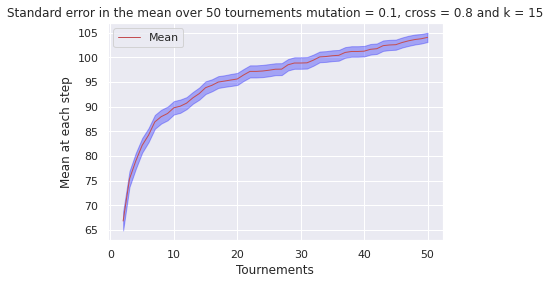

In [ ]:
import seaborn as sns
sns.set()


#plt.errorbar(length, mean, yerr=SE)
plt.plot(length[1:],mean[1:],color='r', linewidth=1)
plt.ylabel("Mean at each step")
plt.xlabel("Tournements")
plt.legend(["Mean"])
plt.title("Standard error in the mean over 50 tournements mutation = 0.1, cross = 0.8 and k = 15")
plt.fill_between(length[1:], subtractionmean[1:], additionmean[1:], color='blue', alpha=0.3)
#plt.fill_between(x, SE, 0, color = 'red')


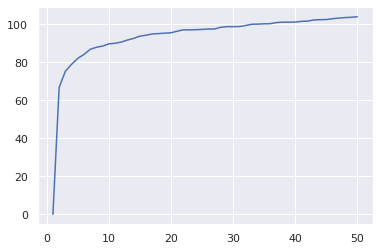

In [ ]:
plt.plot(length,mean)

> **Task**: Code a population of hill climbers that attempt to solve the task in parallel. Plot the fitness of the hillclimbers versus the number of generations. How many individuals are successful for each run. Is a population of hill climbers less or more computational expensive? What happens when you make the problem bigger or change the problem.


**Tips**:
- For a population of hill climbers code many individuals in a matrix and keep fitness values in vector:

In [ ]:
import numpy as np

num_genes = 10
num_individuals = 5 # you probably want more than 5, this is just for plotting

genotypes = np.random.choice([0, 1], (num_individuals, num_items))
fitness = np.zeros(num_individuals)

print(f"All genotypes: \n{genotypes}")
print(f"Genotype 3: {genotypes[3, :]}")
print(f"Genotype 1 gene 7: {genotypes[3, 7]}")

All genotypes: 
[[1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1
  0 1 1 1]
 [0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1
  1 1 1 1]
 [1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1
  0 1 0 1]
 [0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0
  0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0
  0 0 1 1]]
Genotype 3: [0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0
 0 0 0]
Genotype 1 gene 7: 1


In [ ]:
"""
YOUR LOOP HERE
"""

'\nYOUR LOOP HERE\n'

> **Task**: Demonstrate that a local maxima exist. Can you find suboptimal solution that get worse with every mutation but is not the globally optimal solution. It can be helpful to plot fitness over time.

In [ ]:
"""
YOUR LOOP HERE
"""

'\nYOUR LOOP HERE\n'

In [ ]:
"""
YOUR LOOP HERE
"""

'\nYOUR LOOP HERE\n'

In [ ]:
"""
YOUR LOOP HERE
"""

'\nYOUR LOOP HERE\n'

# Full microbial GA
We will now implement a spatial GA. You will to put the population of N individuals on 1D array.

Pseudocode is as follows:
1. Initialise random pop $P$
2. Associate each individual with a position $x$, i.e, let the position of the genotype in the population matrix indicate the position on a 1D grid.
3. Pick one individual at random, i.e. genotype $G_1$ at position $x_1$
4. Pick a second individual $G_2$ in the local neighbourhood of the first, i.e., pick a competitor from the local neighbourhood in the range $x_1+1$ to $x_1 + k$ (start with $k=2$) 5. Compare $G_1$ and $G_2$ finding a winner (W) and loser (L)
6. Copy each gene of the winner W to the L with crossover probability (Pcrossover, say 0.5 to start)
7. Add a mutation to the new L and insert it back to the population.
8. Until success or give up, goto 3



> **Task**  Plot the fitness of the best individual versus the number of generations. Run several runs for fixed number of generations (tournaments) and plot a bar chart of the average fitness in different conditons. How does this algorithm compare to the first two? Does it evolve quicker? Does it get stuck in local minima more or less often. What is the effect of crossover on the speed of evolution?


In [ ]:
# you probably want more than 5, this is just for plotting
xds = 30
population_cost = np.random.choice([0, 1], (xds, num_items))
#fitness = np.zeros(num_individuals)
import copy
import random


In [ ]:
populatio = np.copy(population_cost)

In [ ]:
def selection2(gene_pop):
  #Gets a random genotype from the population
  first_pick = random.randint(0,len(gene_pop)-1)
  second_pick =  random.randint(0,num_individuals+1)%len(gene_pop)
  g1 = gene_pop[first_pick]
  g2 = gene_pop[second_pick, :]
  pick1 = fitness_function(g1, benefits, volumes, max_volume)
  pick2 = fitness_function(g2, benefits, volumes, max_volume)
  #Gets a random neighbour between k
  if pick1 >= pick2:
    return first_pick, second_pick
  else:
    return second_pick, first_pick

# Microbial GA

We will implement a steady GA with tournament selection for the knapsack problem. See lecture notes for a full description. You will need:

1. **Population**: a collection of $N$ genotypes. See previous tips for information on how to encode this.
2. **Genotype - phenotype** mapping (same as before)
3. **A fitness function** same as before, store in vector length $N$.
4. A **tournament selection** method - how to pick some subset of individuals and select some winners
5. A **mutation operator** similar to before. Note here the mutation function should only be changing the genotype and not checking if the fitness is better or worse.

The Pseudocode is as follows:

1. Initialise random pop $P$
2. Pick 2 individuals at random & evaluate them (in terms of fitness) finding a winner (W) and loser (L)
3. Replace L with W
4. Add a mutation to the replacement of L (which is a copy of W)
5. Goto 2

> **Task** Implement the above Pseudocode. Plot the fitness of the best individual versus the number of generations. The number of generations and number of tournaments are one and the same in this case.
How well does it perform? Run several runs for fixed number of generations (tournaments) and plot a bar chart of the average fitness in different conditons.Does it do better than the hillclimber from last week? Whats is the effect of the mutation rate?



In [ ]:

def microbal_function(mutation_probility,tournements_size, num_pop, num_gene):
  fit_list = []
  max_fitness = []
  c = 0
  population = np.random.choice([0, 0], (num_pop, num_gene))
  for i in range(tournements_size):
    winner, loser = selection2(population)
    rand = random.sample(range(len(population)), 2)
    population[loser],fit = mutation(mutation_probility, population[loser])
    fit_list.append(fit)
    max_fitness.append(max(fit_list))
  return fit_list,max_fitness

In [ ]:
print(len(populatio))

30


In [ ]:
listx,maxiumx = microbal_function(0.1, 200,30,40)

In [ ]:
listy,maxiumy = microbal_function(0.5, 200,30,40)

In [ ]:
listz,maxiumz = microbal_function(0.8, 200,30,40)

In [ ]:
length_in_each = [i+1 for i in range(len(listx))]
print(len(listx))

200


Text(0, 0.5, 'Fitness')

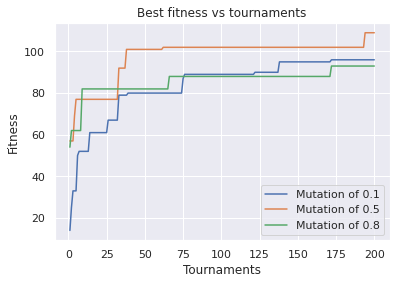

In [ ]:
plt.plot(length_in_each, maxiumx, label = "line 1")
plt.plot(length_in_each, maxiumy, label = "line 1")
plt.plot(length_in_each, maxiumz, label = "line 1")
plt.legend(["Mutation of 0.1", "Mutation of 0.5", "Mutation of 0.8"])
plt.title("Best fitness vs tournaments")
plt.xlabel("Tournaments")
plt.ylabel("Fitness")

In [ ]:
mean_microbalx = []
sum = 0
for i in length_in_each:
  i -=1
  sum += listx[i]
  mean_microbalx.append((sum/(i+1)))


In [ ]:
mean_microbaly = []
sum = 0
for i in length_in_each:
  i -=1
  sum += listy[i]
  mean_microbaly.append((sum/(i+1)))

In [ ]:
mean_microbalz = []
sum = 0
for i in length_in_each:
  i -=1
  sum += listz[i]
  mean_microbalz.append((sum/(i+1)))

Text(0, 0.5, 'Fitness')

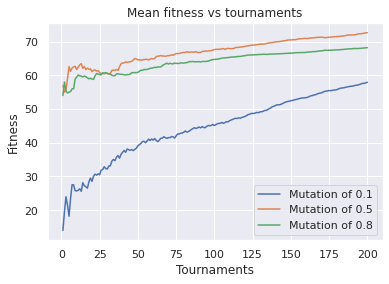

In [ ]:
plt.plot(length_in_each, mean_microbalx, label = "line 1")
plt.plot(length_in_each, mean_microbaly, label = "line 1")
plt.plot(length_in_each, mean_microbalz, label = "line 1")
plt.legend(["Mutation of 0.1", "Mutation of 0.5", "Mutation of 0.8"])
plt.title("Mean fitness vs tournaments")
plt.xlabel("Tournaments")
plt.ylabel("Fitness")

In [ ]:
listx,maxium = microbal_function(0.8, 200,30,40)

In [ ]:
populatio = np.copy(population_cost)

In [ ]:
def Mmicrobal_function(population,mutation_probility,tournements_size):
  fit_list = []
  max_fitness = []
  for i in range(tournements_size):
    winner, loser = selection2(population)
    rand = random.sample(range(len(population)), 2)
    population[loser],fit = mutation(mutation_probility, population[loser])
    fit_list.append(fit)
    max_fitness.append(max(fit_list))
  return fit_list,max_fitness

In [ ]:
listx,maxiumx = Mmicrobal_function(populatio, 0.1, 50)

In [ ]:
listy,maxiumy = Mmicrobal_function(populatio, 0.5, 50)

In [ ]:
listz,maxiumz = Mmicrobal_function(populatio, 0.8, 50)

In [ ]:
length_in_each = [i for i in range(len(maxiumy))]

In [ ]:
mean_microbalx = []
sum = 0
for i in length_in_each:
  i -=1
  sum += listx[i]
  mean_microbalx.append((sum/(i+1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in long_scalars
  


In [ ]:
mean_microbaly = []
sum = 0
for i in length_in_each:
  i -=1
  sum += listy[i]
  mean_microbaly.append((sum/(i+1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in long_scalars
  


In [ ]:
mean_microbalz = []
sum = 0
for i in length_in_each:
  i -=1
  sum += listz[i]
  mean_microbalz.append((sum/(i+1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in long_scalars
  


Text(0, 0.5, 'Fitness')

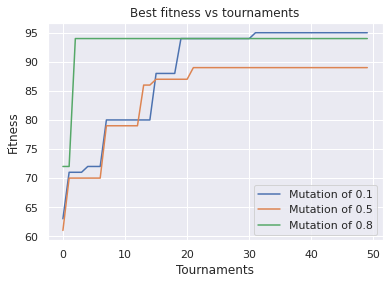

In [ ]:
plt.plot(length_in_each, maxiumx, label = "line 1")
plt.plot(length_in_each, maxiumy, label = "line 1")
plt.plot(length_in_each, maxiumz, label = "line 1")
plt.legend(["Mutation of 0.1", "Mutation of 0.5", "Mutation of 0.8"])
plt.title("Best fitness vs tournaments")
plt.xlabel("Tournaments")
plt.ylabel("Fitness")

Text(0, 0.5, 'Fitness')

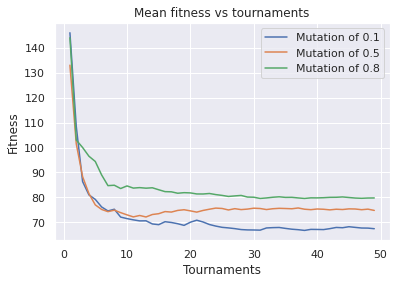

In [ ]:
plt.plot(length_in_each, mean_microbalx, label = "line 1")
plt.plot(length_in_each, mean_microbaly, label = "line 1")
plt.plot(length_in_each, mean_microbalz, label = "line 1")
plt.legend(["Mutation of 0.1", "Mutation of 0.5", "Mutation of 0.8"])
plt.title("Mean fitness vs tournaments")
plt.xlabel("Tournaments")
plt.ylabel("Fitness")

In [ ]:
listx,maxium = Mmicrobal_function(populatio, 0.4, 100)

In [ ]:
print(listx)

[74, 70, 71, 79, 75, 74, 85, 78, 80, 86, 70, 94, 79, 86, 73, 86, 80, 86, 86, 87, 70, 81, 85, 75, 75, 70, 90, 80, 100, 71, 73, 70, 82, 88, 72, 74, 72, 97, 86, 87, 70, 87, 94, 79, 81, 70, 72, 76, 95, 79, 82, 90, 72, 74, 79, 79, 72, 82, 81, 87, 80, 72, 87, 82, 71, 88, 79, 82, 80, 81, 82, 79, 83, 94, 75, 92, 95, 92, 87, 81, 79, 74, 96, 87, 79, 87, 92, 82, 95, 92, 81, 79, 79, 79, 104, 70, 75, 83, 92, 87]


In [ ]:
length_in_each = [i for i in range(len(maxium))]

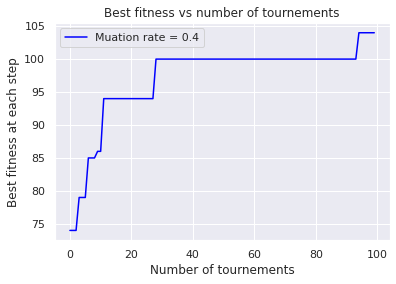

In [ ]:
plt.plot(length_in_each, maxium, color = 'blue')
plt.xlabel("Number of tournements")
plt.ylabel("Best fitness at each step")
plt.title("Best fitness vs number of tournements")
plt.legend(["Muation rate = 0.4"])

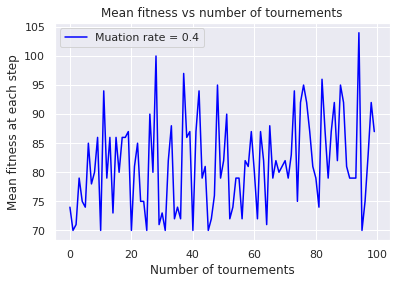

In [ ]:
plt.plot(length_in_each,  listx, color = 'blue')
plt.xlabel("Number of tournements")
plt.ylabel("Mean fitness at each step")
plt.title("Mean fitness vs number of tournements")
plt.legend(["Muation rate = 0.4"])

In [ ]:
listx,maxium = Mmicrobal_function(populatio, 0.4, 50)

In [ ]:
length_in_each = [i for i in range(len(maxium))]

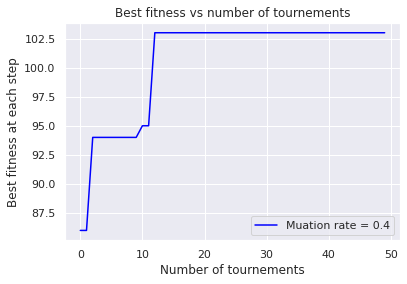

In [ ]:
plt.plot(length_in_each, maxium, color = 'blue')
plt.xlabel("Number of tournements")
plt.ylabel("Best fitness at each step")
plt.title("Best fitness vs number of tournements")
plt.legend(["Muation rate = 0.4"])

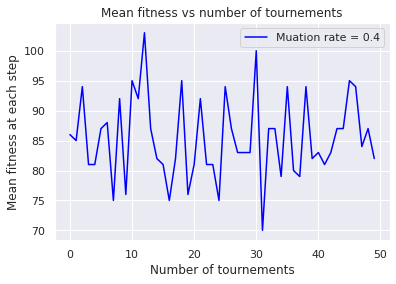

In [ ]:
plt.plot(length_in_each,  listx, color = 'blue')
plt.xlabel("Number of tournements")
plt.ylabel("Mean fitness at each step")
plt.title("Mean fitness vs number of tournements")
plt.legend(["Muation rate = 0.4"])

In [ ]:
listx,maxium = Mmicrobal_function(populatio, 0.4, 100)

In [ ]:
length_in_each = [i for i in range(len(maxium))]

In [ ]:
mean_microbal = []
sum = 0
for i in length_in_each:
  i -=1
  sum += maxium[i]
  mean_microbaly.append((sum/(i+1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in long_scalars
  


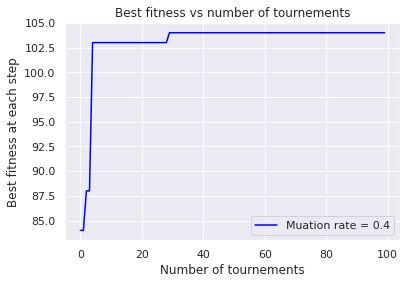

In [ ]:
plt.plot(length_in_each, maxium, color = 'blue')
plt.xlabel("Number of tournements")
plt.ylabel("Best fitness at each step")
plt.title("Best fitness vs number of tournements")
plt.legend(["Muation rate = 0.4"])

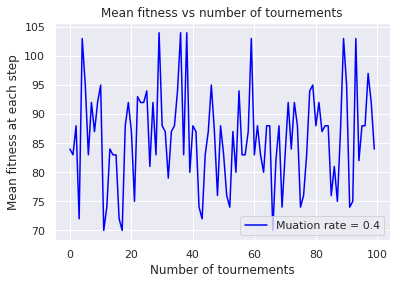

In [ ]:
plt.plot(length_in_each,  listx, color = 'blue')
plt.xlabel("Number of tournements")
plt.ylabel("Mean fitness at each step")
plt.title("Mean fitness vs number of tournements")
plt.legend(["Muation rate = 0.4"])

In [ ]:
listx,maxium = Mmicrobal_function(populatio, 0.8, 100)

In [ ]:
length_in_each = [i for i in range(len(maxium))]

In [ ]:
mean_microbal = []
sum = 0
for i in length_in_each:
  i -=1
  sum += maxium[i]
  mean_microbaly.append((sum/(i+1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in long_scalars
  


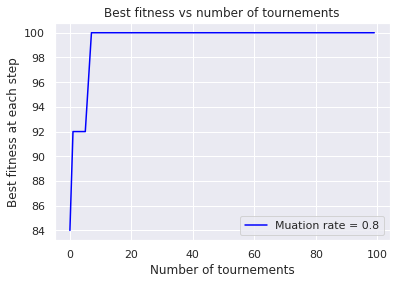

In [ ]:
plt.plot(length_in_each, maxium, color = 'blue')
plt.xlabel("Number of tournements")
plt.ylabel("Best fitness at each step")
plt.title("Best fitness vs number of tournements")
plt.legend(["Muation rate = 0.8"])

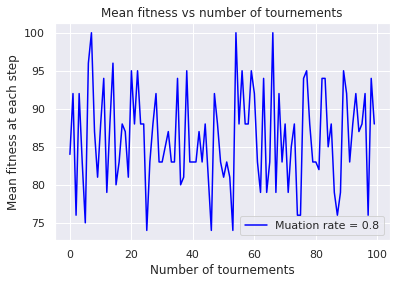

In [ ]:
plt.plot(length_in_each,  listx, color = 'blue')
plt.xlabel("Number of tournements")
plt.ylabel("Mean fitness at each step")
plt.title("Mean fitness vs number of tournements")
plt.legend(["Muation rate = 0.8"])

In [ ]:
listx,maxium = Mmicrobal_function(populatio, 0.8, 50)

In [ ]:
length_in_each = [i for i in range(len(maxium))]

In [ ]:
mean_microbal = []
sum = 0
for i in length_in_each:
  i -=1
  sum += maxium[i]
  mean_microbaly.append((sum/(i+1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in long_scalars
  


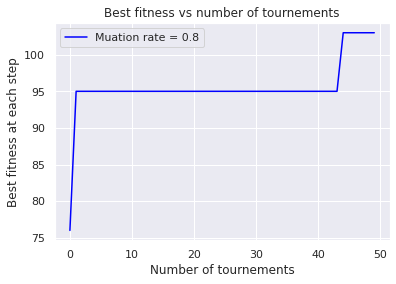

In [ ]:
plt.plot(length_in_each, maxium, color = 'blue')
plt.xlabel("Number of tournements")
plt.ylabel("Best fitness at each step")
plt.title("Best fitness vs number of tournements")
plt.legend(["Muation rate = 0.8"])

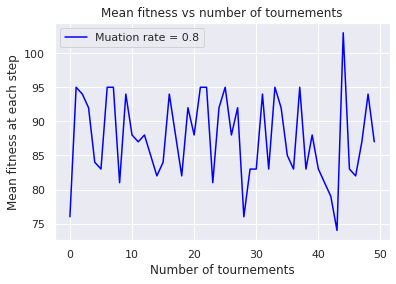

In [ ]:
plt.plot(length_in_each,  listx, color = 'blue')
plt.xlabel("Number of tournements")
plt.ylabel("Mean fitness at each step")
plt.title("Mean fitness vs number of tournements")
plt.legend(["Muation rate = 0.8"])